<b><font size = 3 color = green> <center>TULASI RAMARAO IS620 ( Web Analytics) </font> </center> </b><br><br>
<b>Week 6 Project: <br>
Here is a dataset that shows a simple 2-node network:  the attendance of 18 Southern Women at 14 social events:

Identify a large 2-node network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
What can you infer about each of the distinct groups?
You may work in a small group on the project.

Your code and analysis should be delivered in an IPython Notebook by end of day Sunday October 11th.  You should make a presentation that includes your analysis and any relevant visualizations in our meetup on Thursday October 15th.

Data set downloaded from: linkedin.com
This dataset has my own linkedin dataset. <br>
People I am connected to are represented by nodes, and the links between my connections are shown by the edges/ties.
[ Linkedin's API limit is 500 contact calls per day. Didn't want to exceed if I am testing, so I just downloaded the data first]



In [1]:
# Importing necessary libraries
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# To print inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Read the edgelist the downloaded data
G_fb = nx.read_edgelist("li-dataedges.txt", create_using = nx.Graph())#, nodetype = int)

# G_fb.nodes()
# G_fb.edges(data = True)
colone = []
coltwo = []
# Store the values in two columns 
for e in G_fb.edges():
    colone.append(e[0])
    coltwo.append(e[1])
       

In [4]:
#List of measures for my egocentric network
print nx.info(G_fb)

Name: 
Type: Graph
Number of nodes: 233
Number of edges: 915
Average degree:   7.8541


The number of nodes represent the number of connections including me. This information alone does not talk about the quality of network. The information, opportunities and social support show the quality of the network and this comes from the correlation/inference of the structure of ties between my contacts, not just the number of contacts.

In [39]:
#G_fb is the networkx graph 
nx.connected
#sg = nx.connected_component_subgraphs(G_fb)
#print(type(sg))
#[len(s) for s in sg]

sg = max(sorted(nx.connected_component_subgraphs(G_fb), key = len, reverse=True))
print(sg)
[len(s) for s in sg]
bg_len = s[0]

min_size=0
if min_size is None:
    min_size = math.floor(min_component_ratio * bg_len)

print(min_size)

# you can now loop through all nodes in each sub graph
#for i in range(n):
#    print "Subgraph:", i, "consists of ",sg[i].nodes()


0


In [18]:
# Create a network layout ( for visualization)
spring_pos = nx.spring_layout(G_fb)

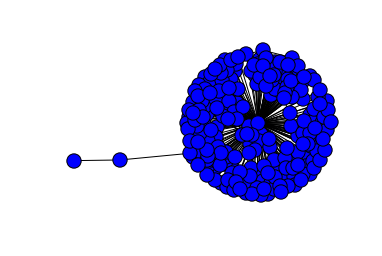

In [19]:
plt.axis("off") # to make it look pretty
nx.draw_networkx(G_fb, pos = spring_pos, with_labels = False, node_size = 205,node_color='b')

Borrowed these 3 methods and community.py from https://github.com/socialsensor/community-evolution-analysis

In [12]:
from multiprocessing import Pool
import itertools

In [13]:
def partitions(nodes, n):
    "Partitions the nodes into n subsets"
    nodes_iter = iter(nodes)
    while True:
        partition = tuple(itertools.islice(nodes_iter,n))
        if not partition:
            return
        yield partition

In [14]:
def btwn_pool(G_tuple):
    return nx.betweenness_centrality_source(*G_tuple)

In [15]:
def between_parallel(G, processes = None):
    p = Pool(processes=processes)
    part_generator = 4*len(p._pool)
    node_partitions = list(partitions(G.nodes(), int(len(G)/part_generator)))
    num_partitions = len(node_partitions)
 
    bet_map = p.map(btwn_pool,
                        zip([G]*num_partitions,
                        [True]*num_partitions,
                        [None]*num_partitions,
                        node_partitions))
 
    bt_c = bet_map[0]
    for bt in bet_map[1:]:
        for n in bt:
            bt_c[n] += bt[n]
    return bt_c

In [19]:
#Between centrality -size of nodes show the values for between centrality
#bt = between_parallel(G_fb)
#top = 10

#max_nodes =  sorted(bt.iteritems(), key = lambda v: -v[1])[:top]
#bt_values = [5]*len(G_fb.nodes())
#bt_colors = [0]*len(G_fb.nodes())
#for max_key, max_val in max_nodes:
#    bt_values[max_key] = 10
#    bt_colors[max_key] = 2
   
 
 # plt.axis("off")
#nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("rainbow"), node_color = bt_colors, node_size = bt_values, with_labels = False)

Analyze the community using community.py

In [20]:
# Community.py downloaded from 
# https://github.com/socialsensor/community-evolution-analysis/blob/master/python/community.py
import community

In [21]:
# partitions the community on similarities
parts = community.best_partition(G_fb)

values = [parts.get(node) for node in G_fb.nodes()]

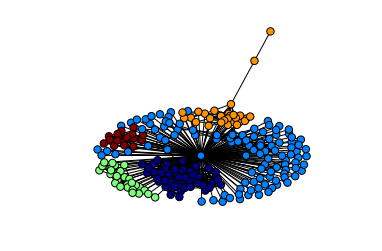

In [22]:
plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size =55, with_labels = False)

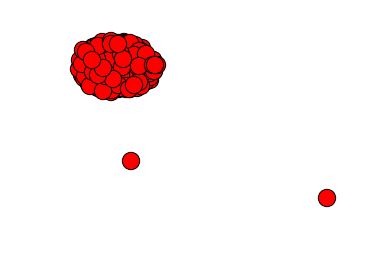

In [40]:
# now project the graph using the bipartite network analysis

from networkx.algorithms import bipartite as bi
clubnet=bi.weighted_projected_graph(G_fb,colone,ratio=False)
weights=[math.log(edata['weight']) for f,t,edata in clubnet.edges(data=True)]
#print("hello",weights)
plt.axis("off")
nx.draw_networkx(clubnet,width=weights,edge_color='b',with_labels=False)
nx.write_graphml(G_fb, "g1li.graphml")

(array([  2.40300000e+04,   0.00000000e+00,   6.02000000e+02,
          3.88000000e+02,   5.89000000e+02,   2.88000000e+02,
          2.27000000e+02,   1.44000000e+02,   3.70000000e+01,
          7.00000000e+00]),
 array([ 0.        ,  0.33322045,  0.6664409 ,  0.99966135,  1.3328818 ,
         1.66610226,  1.99932271,  2.33254316,  2.66576361,  2.99898406,
         3.33220451]),
 <a list of 10 Patch objects>)

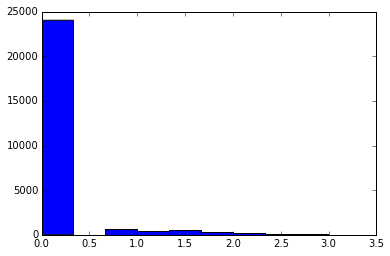

In [42]:
# Trim edges from the text book SNA
def trim_edges(g,weight=1):
    g2=nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight: 
            g2.add_edge(f,to,edata)
    return g2
plt.hist(weights)   

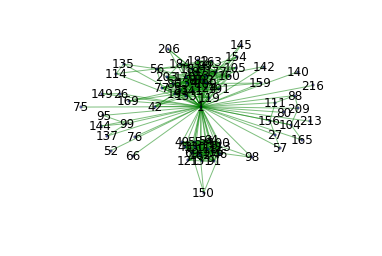

In [47]:

#print(weights)
clubnet_trim=trim_edges(clubnet,weight=math.exp(2.0))

#re-calculate the weights based on the new graph
weights=[edata['weight'] for f,t,edata in clubnet_trim.edges(data=True)]
#print("All weights")
#print(weights)
#net.draw_networkx(clubnet_trim,width=weights,edge_color=weights)
pos=nx.spring_layout(clubnet_trim)
plt.axis("off")
nx.draw_networkx(clubnet_trim,pos = pos,edge_color='g',node_color='b',width=1,alpha=0.5,
                  node_size =5,labels=None)
nx.write_graphml(clubnet_trim, "g2li.graphml")


Use the island method from the text book to pick some part of the data based on the histogram above. The limited data display shows data relationships more clearly. Some nodes are close to each other ( based on the inferred relationships not between people, but on the edges/connections between people) 

To expand the above graph, the output was written to graphml format and opened in Gephi. 
The output looks like the following screens: 

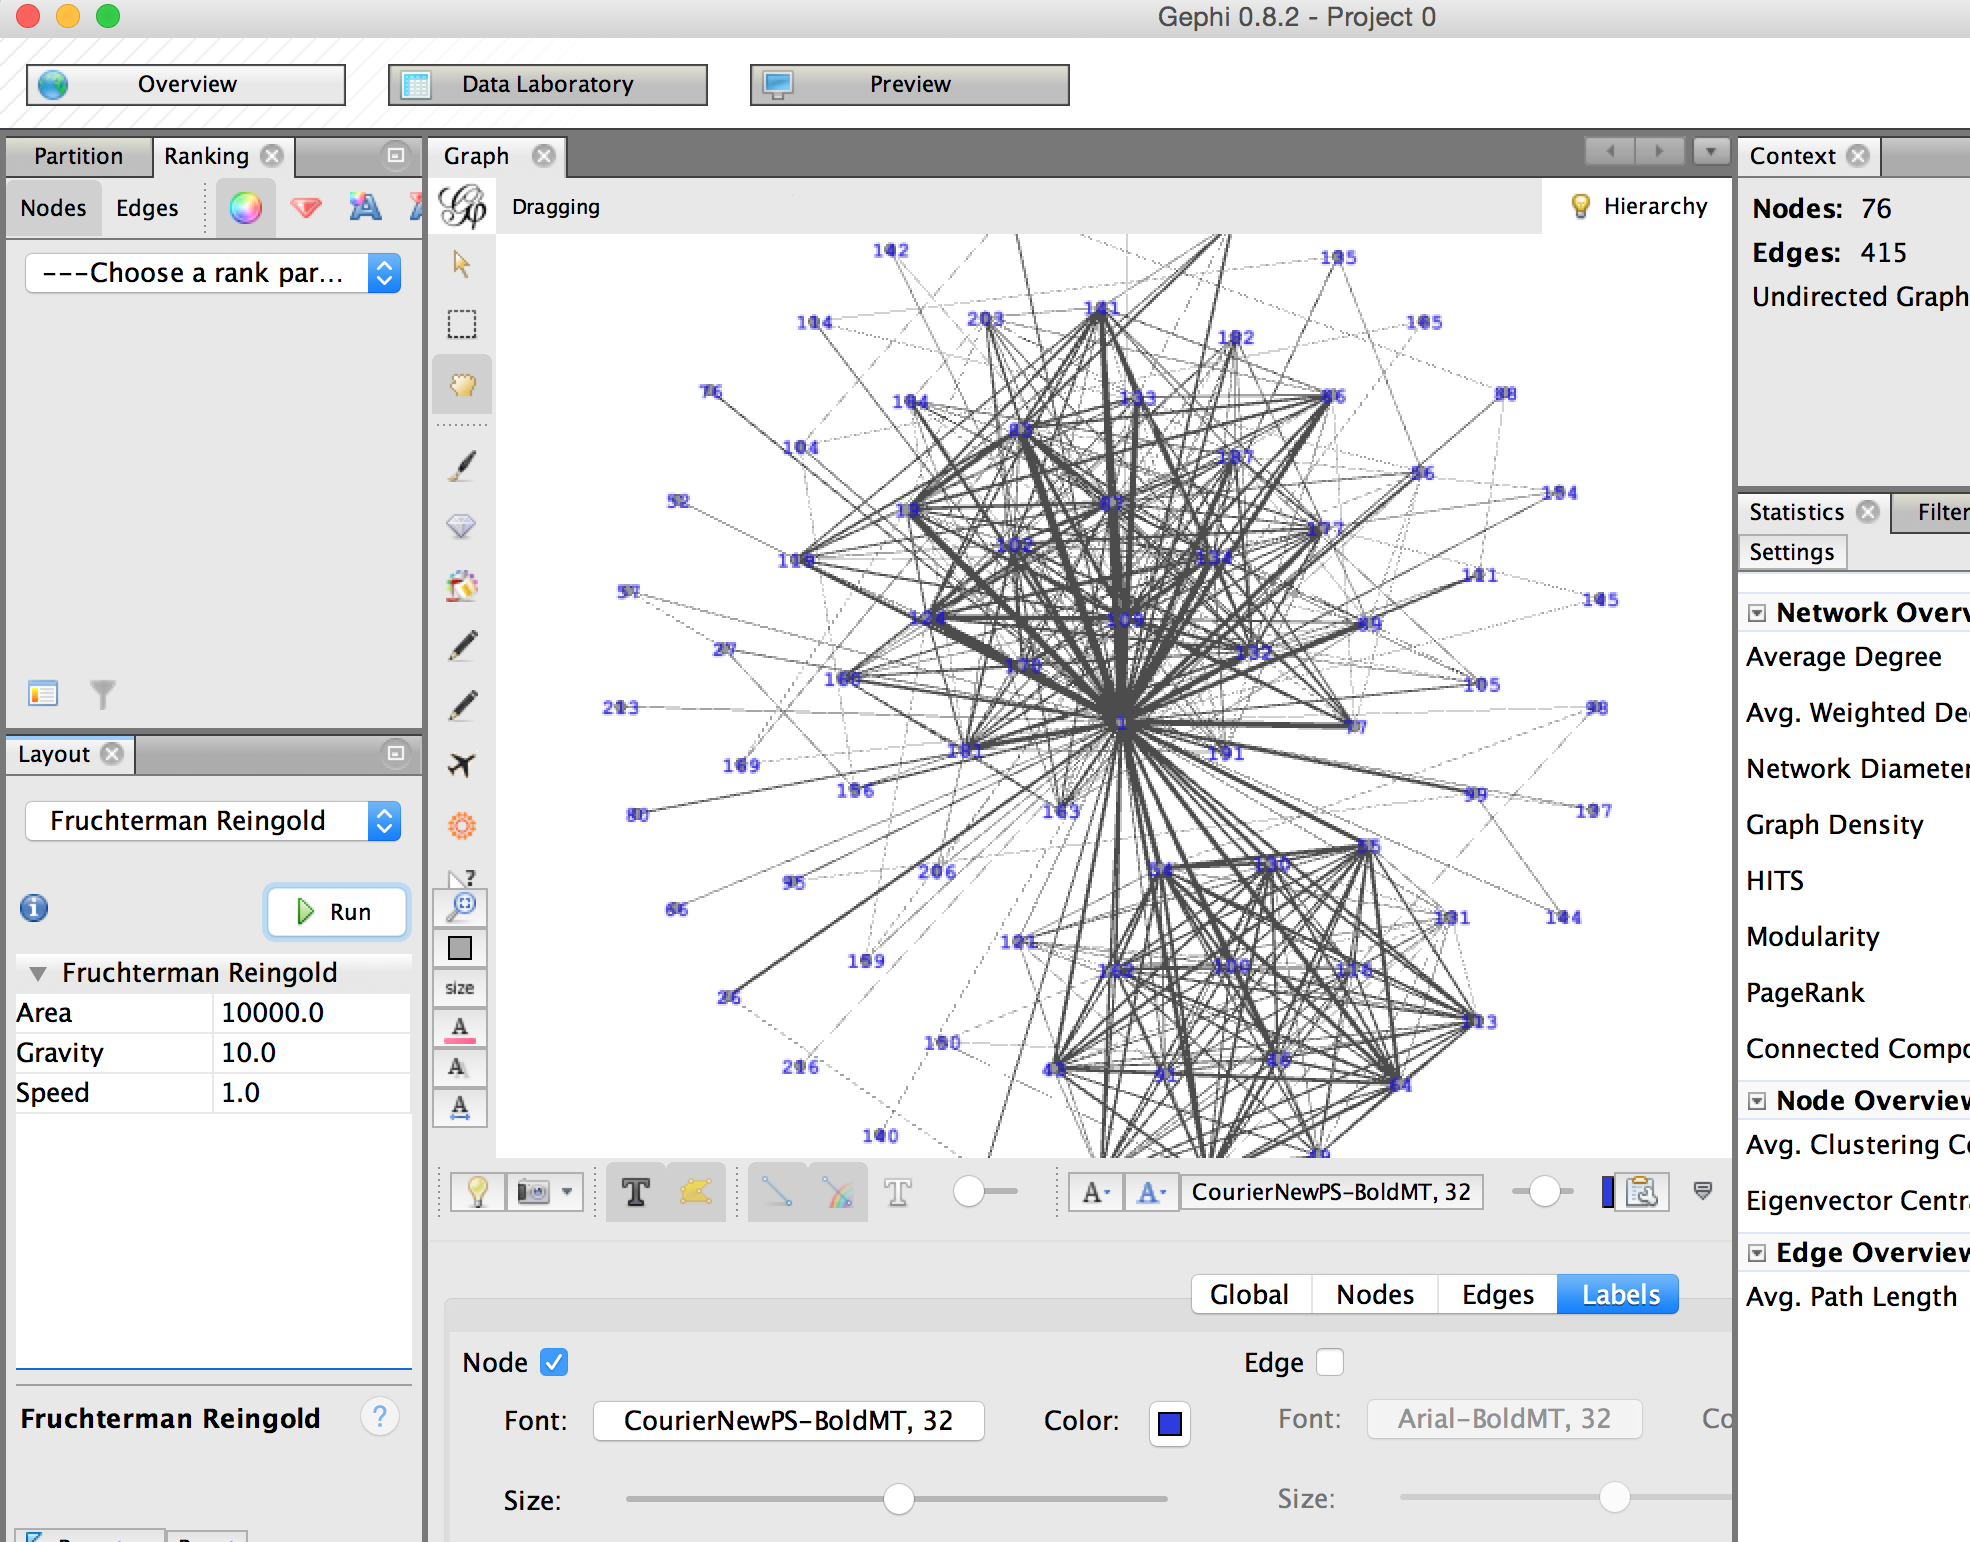

In [45]:
# full screen on gephi
from IPython.display import Image
Image(filename='Gep5liRelaFullScreen.png')


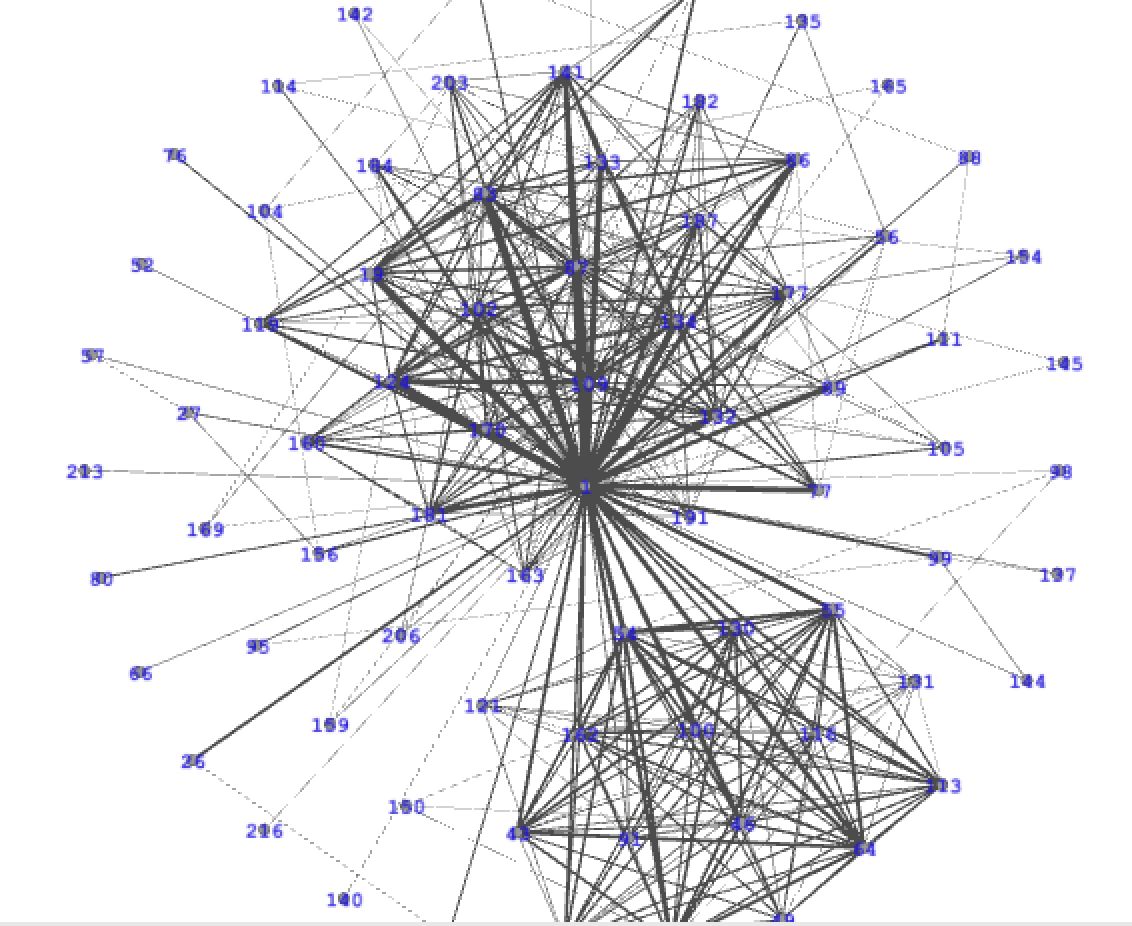

In [46]:

# just the graph
from IPython.display import Image
Image(filename='Gep5liRela.png')

Interesting observation: I hit a surprise by looking at the bridge between 95 and 99. 
These two are my friends one in Albany,NY and the other one in India. They know each other.

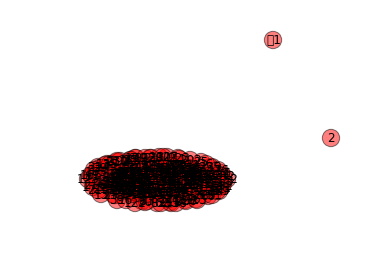

In [48]:


#print(weights)
#Compute an affiliation network of the PACs
pacnet = bi.weighted_projected_graph(G_fb,coltwo,ratio=False)
weights=[math.log(edata['weight']) for f,t,edata in pacnet.edges(data=True)]
# Finally draw the graph
plt.axis("off")
nx.draw_networkx(pacnet,width=weights,edge_color='b',alpha=0.5,labels=None)
nx.write_graphml(clubnet_trim, "g3li.graphml")


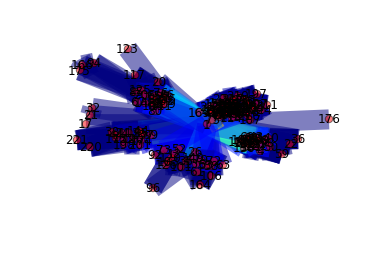

In [49]:
pacnet_trim=trim_edges(pacnet,weight=math.exp(0.75))

#print(weight)
#re-calculate the weights based on the new graph
weights=[edata['weight'] for f,t,edata in pacnet_trim.edges(data=True)]
#print("All weights")
#print(weights)
pos=nx.spring_layout(pacnet_trim)
plt.axis("off")
nx.draw_networkx(pacnet_trim,pos= pos, edge_color=weights,width=20,
                 alpha=0.5,node_size =55,labels=None)
nx.write_graphml(clubnet_trim, "g4li.graphml")

Again, there are nodes that are closely related to each other than the others. Upon researching further into the names of the people in the nodes, it was clear that these people worked in and around the same company/agency. <br>
Inference: It can be inferred that the interaction among endpoints/intersections of this social network is in distinct clusters is likely to occur in the near future. That is, it predicts the absence/presence of edges between two entities that are diverse in character(heterogeneous). So, there is heavy emphasis on the links than the nodes. From page 96 of the text book, we understand the concept of the duality of persons and groups. People’s ideas, attitudes and social connections are shaped by membership in groups and groups in turn are shaped by its members’ attitudes. So it’s inferred that the intersections and endpoints will tend to have similarities in location and connections. The weight of the inferred links between endpoints/insections are emphasized when relationships are continually accumulated( page 97). The 2-mode network analysis is based on the inference of an idea of homiphily ( page 98) that sharing interests or attributes form ties between things which are very different. Loading Gephi produced the images below and the 